This script calculates an error map over the SSE between L-B model and experimental data, when no heating is applied (dark), as a function of A and µ. It is used to find the range of A and µ that give a good fit. In the end the results are saved as a JSON file which is required to do the fitting of Delta_T to experiment.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import warnings
from tqdm import tqdm
import json
import tkinter as tk
from tkinter import filedialog as fd
from ratchet_functions import *
from matplotlib.colors import LogNorm

# Constats

In [2]:
k_B=8.617E-5 #eV
m_e = 9.11E-31 #kg
m_eff=0.023; #Effective mass InAs, in free electron mass.
h_bar = 1.05E-34 #Js
h2m = h_bar**2/(2*m_e*m_eff)*6.24E18 # [eVm^2], 6.24E18 converts from J to eV


# Experimental parameters

In [3]:
T_K=77; # Base temperature in K
kT=T_K*k_B; # K to meV

# Settings

In [5]:

#%matplotlib qt
%matplotlib inline
save_figs = 0
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman" 
#Figures
figwidth = 3.4
figheight = 3.4

# Experimental data
These measurements were taken during the same measurement series with the same BG voltage, directly after eachother, heating voltage is stepped on either side, and one reference measurement without any heating is done afterwards to assure the IV curve under no heating still looks the same. 
---FILE PATH MUST BE MODIFIED IF RUNNING ON ANOTHER COMPUTER.---


In [6]:
filename_heat_gradient_side = '//fysfile01/ftfhome$/jo0651fa/Documents/Lund/Jonatans projects/Ratchet barrier/Data/Raw data used in paper/B1_N2_0911_log15.txt' 
filename_heat_steep_side = '//fysfile01/ftfhome$/jo0651fa/Documents/Lund/Jonatans projects/Ratchet barrier/Data/Raw data used in paper/B1_N2_0911_log14.txt' 
filename_no_heating_N = '//fysfile01/ftfhome$/jo0651fa/Documents/Lund/Jonatans projects/Ratchet barrier/Data/Raw data used in paper/HL01_B1_N2_0212_S11D10_log1.txt' 
filename_no_heating_RT = '//fysfile01/ftfhome$/jo0651fa/Documents/Lund/Jonatans projects/Ratchet barrier/Data/Raw data used in paper/HL01_B1_RT_0112_log4.txt'


# Overvie IV

This is simply to plot the IV curves without backgate voltage for larger Vsd range

In [7]:

filename_1 = filename_no_heating_N 
filename_2 = filename_no_heating_RT 
Data1 = np.loadtxt(filename_1)    
V_bias1 = Data1[:,1]
I_raw1 = Data1[:,2:]
I_exp1, I_std1 = Average_IV_sweeps(counter = 1, n_sweeps = 2, I_raw = I_raw1)

Data2 = np.loadtxt(filename_2)    
V_bias2 = Data2[:,1]
I_raw2 = Data2[:,2:]
I_exp2, I_std2 = Average_IV_sweeps(counter = 1, n_sweeps = 2, I_raw = I_raw2)

### Plotting ###

plt.rcParams.update({'font.size': 12})
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2)

ax1.set_position([0.6, 0.5, 0.3, 0.3])
ax2.set_position([0.6, 0.1, 0.3, 0.3])

ax3.set_position([0.2, 0.5, 0.3, 0.3])
ax4.set_position([0.2, 0.1, 0.3, 0.3])

ax1.plot(V_bias1, I_exp1*1E9, 'k')
ax1.axvline(x=0, linestyle=':', color='k', linewidth = 1)
ax1.axhline(y=0, linestyle=':', color='k', linewidth = 1)

ax2.plot(V_bias1, abs(I_exp1*1E9), 'k')

ax3.plot(V_bias2, I_exp2*1E9, 'k')
ax3.axvline(x=0, linestyle=':', color='k', linewidth = 1)
ax3.axhline(y=0, linestyle=':', color='k', linewidth = 1)

ax4.plot(V_bias2, abs(I_exp2*1E9), 'k')

ax3.set_ylabel('I [nA]')
ax4.set_ylabel('I [nA]')

ax2.set_xlabel('V [V]')
ax4.set_xlabel('V [V]')

ax2.set_yscale('log')
ax4.set_yscale('log')

ax1.set_xlim(-1, 1)
ax1.set_ylim(-0.5, 0.5)
ax1.set_xticks([])
ax1.set_yticks([-0.5, 0, 0.5])

ax2.set_xlim(-1, 1)
ax2.set_ylim(1E-3, 1)

ax3.set_ylim(-5, 5)
ax3.set_xlim(-0.3,0.3)
ax3.set_xticks([])
ax3.set_yticks([-5, 0, 5])

ax4.set_xlim(-0.3,0.3)
ax4.set_ylim(1E-3,1)
ax4.set_xticks([-0.3, 0, 0.3])
fig.set_size_inches(figwidth*1.5, figheight*1.5)

if save_figs == 1:
    savename_fig = get_savefile(title='Save IV curves as (no extension)')
    fig.savefig(savename_fig+'.svg')
    fig.savefig(savename_fig+'.png')


OSError: //fysfile01/ftfhome$/jo0651fa/Documents/Lund/Projects/Ratchet barrier/Model triangular barrier/Data/HL01_B1_N2_0212_S11D10_log1.txt not found.

## Loading data into variables


In [8]:
V_h = np.linspace(0, 0.4, 9) #array of the applied total V_h, read manually from text data file, typically it is applied symetrically +/- across the heater so you need to add them up
n_sweeps = 6 #number of IV sweeps per heating voltage, 6 times in the data we use for the manuscript



For heating on the gradient side (G)

In [ ]:
filename_G = filename_heat_gradient_side   
Data_G = np.loadtxt(filename_G, skiprows=2)    
V_bias_G = Data_G[:,1]
I_raw_G = Data_G[:,2:]
### for each heating voltage, average IV curve over n_sweeps number of sweeps and create matrix with averaged IV curves for each Vh
I_exp_G = Average_IV_sweeps(counter = len(V_h), n_sweeps = n_sweeps, I_raw = I_raw_G)[0]
I_exp_dark_G = I_exp_G[:,0]


For heating on the steep side

In [ ]:
filename_S = filename_heat_steep_side   
Data_S = np.loadtxt(filename_S, skiprows=2)    
V_bias_S = Data_S[:,1]
I_raw_S = Data_S[:,2:]
### for each heating voltage, average IV curve over n_sweeps number of sweeps and create matrix with averaged IV curves for each Vh
I_exp_S = Average_IV_sweeps(counter = len(V_h), n_sweeps = n_sweeps, I_raw = I_raw_S)[0]
I_exp_dark_S = I_exp_S[:,0]


The current is averaged in order to remove some noise, see below:

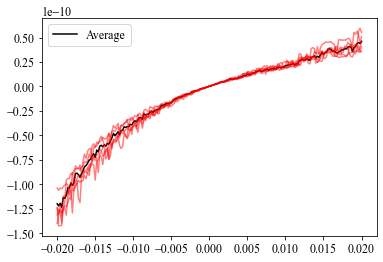

In [ ]:
plt.figure()
plt.plot(V_bias_G, I_exp_dark_G, 'k', label = 'Average')
plt.plot(V_bias_G,I_raw_G[:,0:5], 'r', alpha = 0.5)
plt.legend()

# Plotting all curves
Just a sanity check


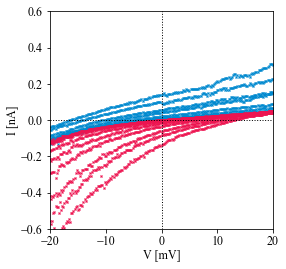

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman" 
figwidth = 4
figheight = 4
fig, ax = plt.subplots()
ax.plot(V_bias_S*1E3, I_exp_S*1E9, 'x', color = (0/255, 137/255, 207/255), ms = 2, label='steep')
ax.plot(V_bias_G*1E3, I_exp_G*1E9, 'x', color = (237/255, 20/255, 80/255), ms = 2, label='Source')
vline = ax.axvline(x=0, linestyle=':', color='k', linewidth = 1)
hline = ax.axhline(y=0, linestyle=':', color='k', linewidth = 1)

ax.set_xlim(-20, 20)
ax.set_ylim(-0.6, 0.6)

ax.set_xlabel('V [mV]', labelpad=2)
ax.set_ylabel('I [nA]', labelpad=2)
fig.set_size_inches(figwidth, figheight)


## Load transmisison
Transmission probability is calculated in a separate script "Calculate_transmission.ipynb", the output files are located in folder Ratchet barrier/Model/Calculated transmission in JSON format.
I recommend choosing the file with the highest number of steps for the voltage range applicable, e.g. "20mV" in file name means Vsd is varied in the range +/- 20 mV, so the file "Transmission_20mv_340meV_92nm_1000steps" would then be suitable, wheer 340meV_92nm define the barrier geometry (height and length)


In [ ]:
load_T = 1

if load_T == 1:
    filename_T = get_file(title = 'json file containing calculated transmission')
elif load_T== 0:
    filename_T = ''#In case you want to just input it manually, copy paste filepath here and set load_T = 0
    
Jason_T = open(filename_T, 'r').read()
dictionary_T = json.loads(Jason_T)

E_array = np.array(dictionary_T['E'])
T_QM = np.array(dictionary_T['T_QM']).T
T_WKB = np.array(dictionary_T['T_WKB']).T

L=dictionary_T['L'] #92*1E-9; #barrier length in m std:+/-7nm
U_top=dictionary_T['U_top'] #0.340#560; #barrier height in eV std: +/-0.03 eV

dE=dictionary_T['dE'] #1E-4     #Integration stepsize for landauer Buttiker integral
V_sd=V_bias_S#np.linspace(-20E-3, 20E-3, 20)

Plot transmission, for sanity check

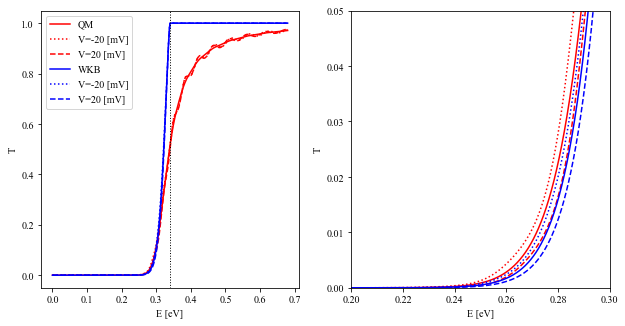

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(E_array, T_QM[:,int(len(V_sd)/2)], 'r', label = 'QM')
ax1.plot(E_array, T_QM[:,-1], 'r:', label = 'V=-20 [mV]')
ax1.plot(E_array, T_QM[:,0], 'r--', label = 'V=20 [mV]')
ax1.plot(E_array, T_WKB[:,int(len(V_sd)/2)], 'b', label = 'WKB')
ax1.plot(E_array, T_WKB[:,-1], 'b:', label = 'V=-20 [mV]')
ax1.plot(E_array, T_WKB[:,0], 'b--', label = 'V=20 [mV]')
ax1.axvline(x=U_top, linestyle=':', color='k', linewidth = 1)
ax1.legend()
ax1.set_xlabel('E [eV]')
ax1.set_ylabel('T')
ax2.set_ylim(0, 1)# 0.01)
ax2.set_xlim(0, 1) #0.48, 0.52)

ax2.plot(E_array, T_QM[:,int(len(V_sd)/2)], 'r', label = 'QM')
ax2.plot(E_array, T_QM[:,-1], 'r:', label = 'V=-20 [mV]')
ax2.plot(E_array, T_QM[:,0], 'r--', label = 'V=20 [mV]')
ax2.plot(E_array, T_WKB[:,int(len(V_sd)/2)], 'b', label = 'WKB')
ax2.plot(E_array, T_WKB[:,-1], 'b:', label = 'V=-20 [mV]')
ax2.plot(E_array, T_WKB[:,0], 'b--', label = 'V=20 [mV]')
ax2.set_ylim(0, 0.05)# 0.01)
ax2.set_xlim(0.2, 0.3) #0.48, 0.52)
ax2.set_xlabel('E [eV]')
ax2.set_ylabel('T')

fig.set_size_inches(figwidth*3, figheight*1.5)


## Fermi distribution
Just to check that the fermi dirac distribution looks reasonable

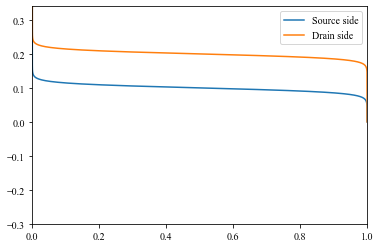

In [ ]:
f_G, f_S = fermi_dirac(mu = 0.2, E = E_array, V = 0.1, kDeltaT_G = 0 ,kDeltaT_S = 0, T = 77)
plt.figure()
plt.plot(f_G, E_array, label='gradient side')
plt.plot(f_S, E_array, label='steep side')
plt.xlim(0,1)
plt.ylim(-0.3,U_top)
plt.legend()


# Fitting A and µ after only the IV with no heating

In [ ]:
#create arrays for the looping/fitting of variables
A_array = np.logspace(-10, 10, 401) # np.logspace(1E12, 1E15, 51) # #
mu_array = np.linspace(10, 500, 490+1)*1E-3   #eV 

#File to fit after
I_exp_dark = I_exp_dark_G
V_bias = V_bias_G 
I_exp = I_exp_G

In [ ]:
save_figs = 0
save_data = 1
if save_figs == 1:

    savename_fig = get_savefile(title='Save plot as (no extension)')

if save_data == 1:
    savename_data = get_savefile(title='Save data in json file as', extension='.json')

## Calculate error for every pair of µ and A

In [ ]:
Error = np.zeros((len(mu_array), len(A_array)))


for i_A, A in enumerate(tqdm(A_array, position=0, leave=True)):
    for i_m, mu in enumerate(mu_array): 
        I_model = np.zeros(len(V_sd))

        for i_V, V in enumerate(V_sd):
            f_G, f_S = fermi_dirac(mu, E_array, V, kDeltaT_G = 0 ,kDeltaT_S = 0, T = 77)
            I_model[i_V] = Landauer_Buttiker(T_QM[:,i_V], f_S, f_G, A, dE)

        Error[i_m, i_A] = SumOfSquaredError(I_model, I_exp_dark)
        
### Find min ###
min_index = np.where(Error == np.min(Error))  #A tupple containing the inex where min error is found


### Min A for each µ, "linecut"
Error_min_array = np.zeros(len(mu_array))
A_min_array = np.zeros(len(mu_array))
for i in range(len(mu_array)):
    Error_min_array[i] = min(Error[i,:])
    A_min_array[i] = np.argmin(Error[i,:])
Error_min = min(Error_min_array)
mu_min = mu_array[find_nearest(Error_min_array, Error_min)]

A_min = A_array[int(A_min_array[np.argmin(Error_min_array)])]

I_model = np.zeros(len(V_sd))
for i, V in enumerate(V_sd):
    f_G, f_S = fermi_dirac(mu = mu_min, E = E_array, V = V, kDeltaT_G = 0 ,kDeltaT_S = 0, T = 77)

    I_model[i] = Landauer_Buttiker(T_QM[:,i], f_S, f_G, A_min, dE)

100%|██████████| 401/401 [1:47:55<00:00, 16.15s/it]


In [ ]:
### Min A for each µ, "linecut"
Error_min_index = []

for i in range(len(mu_array)):
    Error_min_index.append([i,  np.argmin(Error[i,:])])


Error_min_array = np.zeros(len(mu_array)) #The smallest error for each µ
A_min_array = np.zeros(len(mu_array))   #The A that minimizes error for each µ
for i in range(len(mu_array)):
    A_min_array[i] = A_array[Error_min_index[i][1]]
    Error_min_array[i] = Error[Error_min_index[i][0], Error_min_index[i][1]]

Error_min = min(Error_min_array)
mu_min = mu_array[find_nearest(Error_min_array, Error_min)]
A_min = A_min_array[find_nearest(Error_min_array, Error_min)]

I_model = np.zeros(len(V_sd))
for i, V in enumerate(V_sd):
    f_G, f_S = fermi_dirac(mu = mu_min, E = E_array, V = V, kDeltaT_G = 0 ,kDeltaT_S = 0, T = 77)
    I_model[i] = Landauer_Buttiker(T_QM[:,i], f_S, f_G, A_min, dE)

Plot


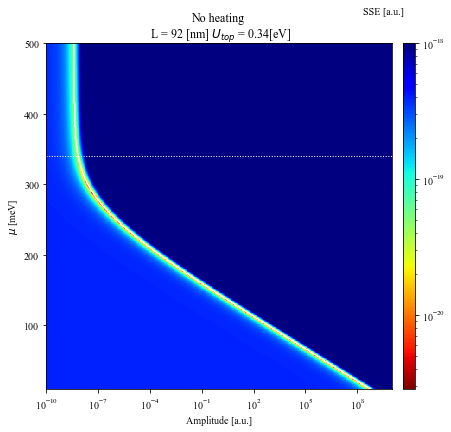

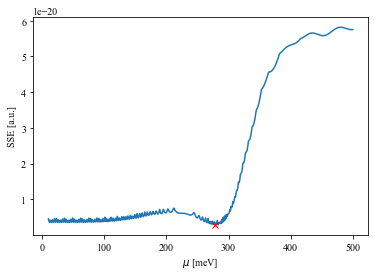

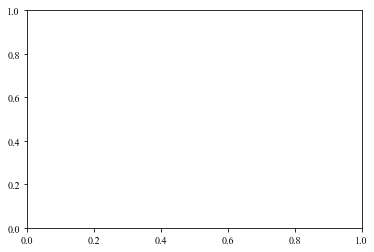

In [ ]:
figwidth = 4
figheight = 4

plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman" 
#%matplotlib qt
%matplotlib inline
### Colormap ###
fig, ax = plt.subplots()
ax.set_position([0.2, 0.2, 0.6, 0.6])    # Manually set "data frame" size: x, y, widht, height in precentage of full window
fig.set_size_inches(figwidth*2, figheight*2) 

errormap = plt.pcolormesh(A_array, mu_array*1E3, Error, norm = LogNorm(), cmap=plt.get_cmap('jet_r'), rasterized = True, vmax=1E-18)#, vmin=1E-22)#norm = LogNorm(),, rasterized = True for faster rendering/saving as image,  #_r to inverse colors, 
#ax.plot(A_min_S, mu_min_S*1E3, 'kx', ms = 15)
ax.plot(A_min_array, mu_array*1E3, 'w')

ax.axhline(y=U_top*1E3, linestyle=':', color='w', linewidth = 1)

ax.set_xlabel('Amplitude [a.u.]')
ax.set_ylabel('$\mu$ [meV]')
ax.set_xscale('log')
ax.set_title('No heating \n L = {:.0f} [nm] '.format(L*1E9) + '$U_{{top}}$ = {:.2f}[eV]'.format(U_top))
cbaxes = fig.add_axes([0.82, 0.2, 0.02, 0.6])
cb = plt.colorbar(cax = cbaxes)#ax2, cax = cbaxes)
fig.text(0.75, 0.85 ,'SSE [a.u.]')

fig_linecut, ax_linecut = plt.subplots()
ax_linecut.plot(mu_array*1E3, Error_min_array)
#ax_linecut.plot(mu_min*1E3, Error_min, 'rx')

ax_linecut.set_xlabel('$\mu $ [meV]')
ax_linecut.set_ylabel('SSE [a.u.]')

#IV curve
#fig2, ax2 = plt.subplots()

#plot_I_exp = ax2.plot(V_bias*1E3, I_exp[:,0]*1E9, 'rx')
#plot_I_model = ax2.plot(V_bias*1E3, I_model*1E9, 'k', label='$\mu$ = {:.0f} [eV]'.format(mu_min*1E3))
#hline = ax2.axhline(y=0, linestyle=':', color='k', linewidth = 1)
#vline = ax2.axvline(x=0, linestyle=':', color='k', linewidth = 1)
#ax2.legend()
#ax2.set_xlabel('V [mV]', labelpad=2)
#ax2.set_ylabel('I [nA]', labelpad=2)
#ax2.set_title('No heating, L = {:.0f} [nm], '. format(L*1E9) + 'A = {:.1E}'.format(A_min))

if save_figs == 1:

    fig.savefig(savename_fig+'.svg')
    fig.savefig(savename_fig+'.png')

    fig_linecut.savefig(savename_fig+'_linecut.svg')
    fig_linecut.savefig(savename_fig+'_linecut.png')

if save_data == 1:
    
    ###Data
    data = {
        "V": V_bias_S.tolist(),
        "I_exp": I_exp_S[:,0].tolist(),
        "I_model":I_model.tolist(),
        "Ampl_list": A_array.tolist(),
        "mu_list": mu_array.tolist(),
        "Error": Error.tolist(),
        # #parameters
        "Ampl":A_min,
        "mu":mu_min,
        "L":L,
        "dE": dE,
        "T_base": T_K,
        "U_top": U_top
        }
    json.dump(data, open(savename_data, 'w'))

    